<a href="https://colab.research.google.com/github/Bosy-Ayman/SoftwareEngineering/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

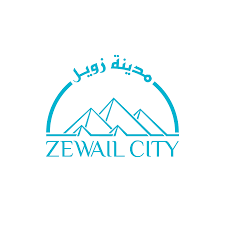



**Zewail city for science and technology**

**School of Computational Sciences & Artificial Intelligence**

**Artificial intelligence – CSAI 301**


# **lab1**


---


#**HOWTOs for AI with Python**

*  How to make charts with mathplotlib and tables with pandas

*   How to use random numbers and arrays in numpy

*   How to profile Python code to improve runtime.How to profile Python code to improve runtime.
*  How to apply OOP concepts using python lanuage








#**[How to profile Python code to improve runtime]**

It is often important to compare the run-time of different algorithms or to find out where an implementation wastes time or consumes too much memory.
Details on timing code and memory profiling in notebooks is explained in:
https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

# Timing

**[A] Manual timing using the time package**

In [ ]:
import time

t0 = time.time()
for i in range(100000): pass
t1 = time.time()

print(f"Counting to 100000 took {round((t1-t0) * 1e3, 3)} milliseconds wall-clock time")

Counting to 100000 took 4.849 milliseconds wall-clock time


In [ ]:
import time

t0 = time.time()
for i in range(100000):

t1 = time.time()

print(f"Counting to 100000 took {round((t1-t0) * 1e3, 3)} milliseconds wall-clock time")

IndentationError: expected an indented block after 'for' statement on line 4 (<ipython-input-12-bb62f789818b>, line 6)

**[b]Using the timit package**

In [ ]:
import timeit

N = 100

tm = timeit.timeit('for i in range(100000): pass',
                   globals = globals(), number = N)

print(f"This took on average: {tm/N * 1e3} milliseconds")

This took on average: 2.580742119999968 milliseconds


The timit package is useful to measure time for code that is called repeatedly. Note that repeatedly executing code is much faster in Python.

**Timing with magic lines**

In [ ]:
%time for i in range(100000): pass

CPU times: user 5.18 ms, sys: 0 ns, total: 5.18 ms
Wall time: 5.12 ms


In [ ]:
%timeit for i in range(100000): pass

2.59 ms ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Timeit runns the code several times to get a better estimate

## Using cProfile

Profiling can be used to find the part of your program that uses up most of the time.
See: https://docs.python.org/3/library/profile.html

In [ ]:
import cProfile

def my_function(n = 1000):
    for i in range(n):
        sum(range(n))

cProfile.run('my_function()')

         1004 function calls in 0.017 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002    0.017    0.017 1525638392.py:3(my_function)
        1    0.000    0.000    0.017    0.017 <string>:1(<module>)
        1    0.000    0.000    0.017    0.017 {built-in method builtins.exec}
     1000    0.015    0.000    0.015    0.000 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




We see that most time (see `tottime`) is spent in the 1000 calls to `builtins.sum`.

For nodebooks you can also use the magic command `%prun`.

In [ ]:
def my_function(n = 1000):
    for i in range(n):
        sum(range(n))

%prun my_function()

         1004 function calls in 0.026 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1000    0.022    0.000    0.022    0.000 {built-in method builtins.sum}
        1    0.004    0.004    0.025    0.025 571169245.py:1(my_function)
        1    0.000    0.000    0.026    0.026 {built-in method builtins.exec}
        1    0.000    0.000    0.025    0.025 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

# **[How to make charts with mathplotlib and tables with pandas]**




*  matplotlib can be used to create simple charts (histograms, line charts, etc.). See: https://matplotlib.org/

*   pandas can be used for data frames (tables).



**Create some data**


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# create some artificial performance data for 3 agents and 100 runs of a O(n^2) algorithm
# create data for problem size n = 1 .. 100.
n_max = 100
runtime = {
    "agent 1" : np.abs(np.add(np.power(np.divide(range(n_max), 10), 2),
                              np.random.normal(loc = 0, scale = 10, size = n_max))),
    "agent 2" : np.abs(np.add(np.power(np.divide(range(n_max),  5), 2),
                              np.random.normal(loc = 0 , scale = 10, size = n_max))),
    "agent 3" : np.abs(np.add(np.power(np.divide(range(n_max), 12), 2),
                              np.random.normal(loc = 0 , scale = 10, size = n_max)))
}

# show data as a data frame using pandas
df = pd.DataFrame(runtime)
df

,agent 1,agent 2,agent 3
0,16.539953,4.077878,19.144447
1,1.544813,15.769641,8.747929
2,29.600987,0.774183,3.602937
3,7.576287,11.731018,21.875104
4,15.912873,16.218874,14.312208
...,...,...,...
95,84.994713,372.646256,64.209827
96,96.360534,361.639031,59.557807
97,84.122449,389.170451,44.353983
98,117.337104,391.452115,63.858511


In [ ]:
# create data for n = 10 and N = 100 replications, so we can compare distributions.
N = 100
performance = {
    "agent 1" : np.add(100, np.random.normal(loc = 0, scale = 10, size = N)),
    "agent 2" : np.add(120, np.random.normal(loc = 0, scale = 20, size = N)),
    "agent 3" : np.add(70,  np.random.normal(loc = 0, scale =  5, size = N))
}

# show data as a data frame using pandas
df = pd.DataFrame(performance)
df

,agent 1,agent 2,agent 3
0,86.512597,114.545164,73.354119
1,88.728940,131.793913,73.905027
2,93.045249,143.669712,71.846173
3,95.880845,87.525968,68.909628
4,91.154652,114.754415,79.079421
...,...,...,...
95,109.340323,75.241750,58.720303
96,117.260829,133.701042,67.658196
97,83.219238,126.220151,76.640683
98,110.062993,129.638509,71.539108


# **Charts**

#Line Charts
Plot run time as a function of problem size
. This can be used to compare the runtime and look at scalability.

In [ ]:
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns
sns.set(style="whitegrid")

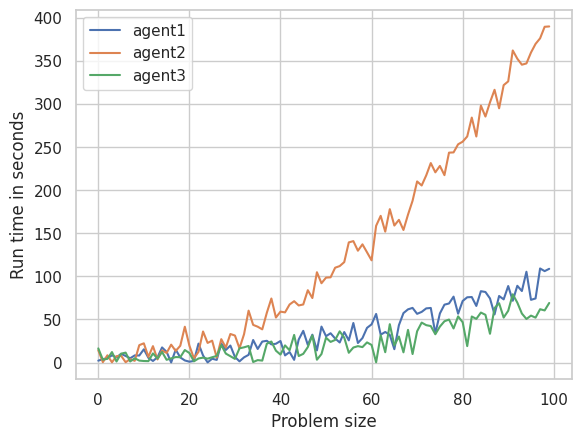

In [ ]:
x = range(N)
plt.plot(x, runtime["agent 1"], label = "agent1")
plt.plot(x, runtime["agent 2"], label = "agent2")
plt.plot(x, runtime["agent 3"], label = "agent3")
plt.xlabel("Problem size")
plt.ylabel("Run time in seconds")
plt.legend()
plt.show()

# Scatter plots
Scatter plots
Compare N runs of a fixed problem size of n=10
. Here the runtimes of the two agents are not correlated (because I randomly generated the data). Most of the points are above the diagonal indicating that agent 2 has higher performance.

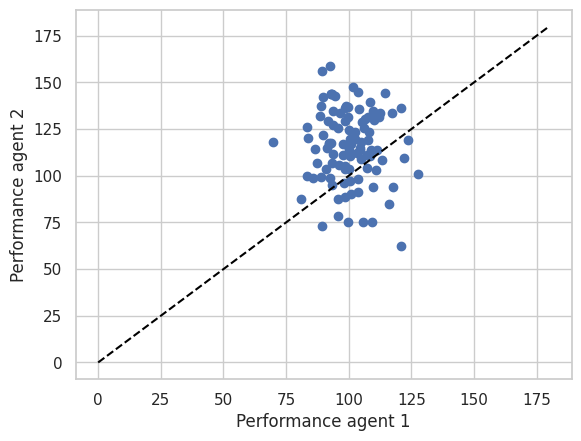

In [ ]:
plt.scatter(performance["agent 1"], performance["agent 2"])
plt.xlabel("Performance agent 1")
plt.ylabel("Performance agent 2")
plt.plot([0, 180], [0, 180], "--", color = "black")
plt.show()

#Bar plots
Compare the average performance performance.

Mean performance: [100.42640023 115.89076104  70.02237947]


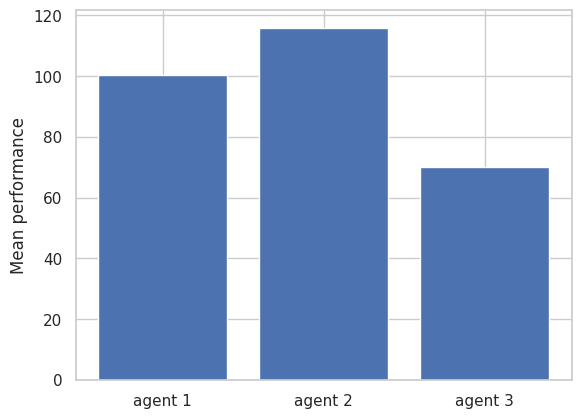

In [ ]:
mean_performance = np.mean(list(performance.values()), axis = 1)

print(f"Mean performance: {mean_performance}")

plt.bar(performance.keys(), mean_performance)
plt.ylabel("Mean performance")
plt.show()

#Histograms
Show the distribution of the performance for an agent.

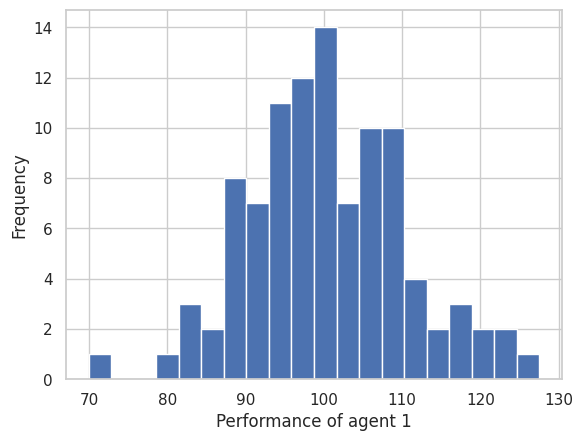

In [ ]:
plt.hist(performance["agent 1"], bins = 20)
plt.xlabel("Performance of agent 1")
plt.ylabel("Frequency")
plt.show()

Use histograms to compare the performance distribution between agents.

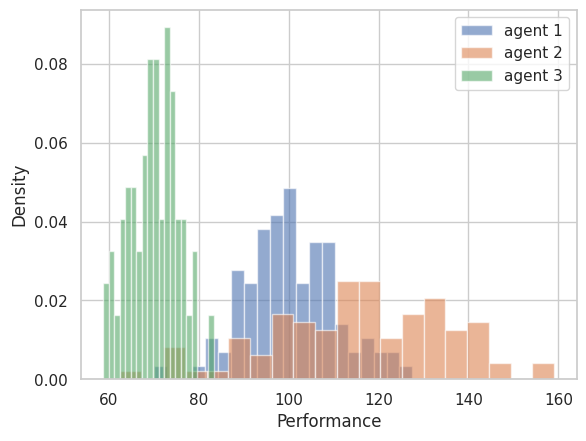

In [ ]:
plt.hist(performance["agent 1"], bins = 20, alpha = .4, density=True)
plt.hist(performance["agent 2"], bins = 20, alpha = .4, density=True)
plt.hist(performance["agent 3"], bins = 20, alpha = .4, density=True)
plt.xlabel("Performance")
plt.ylabel("Density")
plt.legend(labels = ["agent 1", "agent 2", "agent 3"])
plt.show()

#Boxplots
Compares distributions using a simplified representation of the histogram as a box (containing the middle 50% of the data) with wiskers. The notches (cutouts) around the median show the 95% confidence interval around the median. If the notches between two boxes do not overlap, then one is significantly better than the other (at a p-value of 0.05). In this case, agent 2 is significantly better than agent 1.

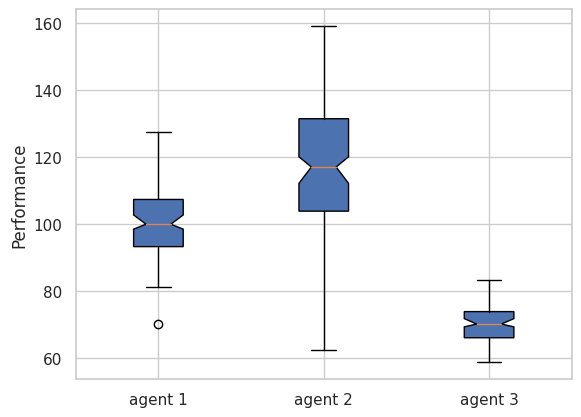

In [ ]:
bplot = plt.boxplot(list(performance.values()),
                     notch = True,                 # show 95% confidence intervals around the median
                     bootstrap = 1000,             # used to calculate the notches
                     vert = True,                  # vertical box alignment
                     patch_artist = True,          # fill with color
                     labels = performance.keys())  # will be used to label x-ticks
plt.ylabel("Performance")
plt.show()

#Show Tables
Tables in code can be printed in several ways. The easiest is to use pandas dataframes. Unfortunately, it cannot print custom row names.



In [ ]:
import numpy as np

data = np.array([[1, 2], [3 ,4], [5, 6]])

print(data)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
import pandas as pd
pd.DataFrame(data, columns=["x", "y"])

,x,y
0,1,2
1,3,4
2,5,6


# **[How to use random numbers and arrays in numpy]**

Random number generators are defined in package `numpy`. See: https://numpy.org/doc/stable/reference/random/

The following example throws a fair coin where `True` represents head and `False` is tail (i.e., head is false).

In [ ]:
import numpy as np

# initialize a new random number generator
rng = np.random.default_rng()

p = .5

for i in range(5):
    print(rng.random() < p)

True
False
False
True
False


A useful function is `random.choice`. Here is again a fair coin.

In [ ]:
rng.choice([True, False], size = 5, p = [p, 1-p])

array([False,  True, False, False, False])

# Multi-dimensional arrays

Package `numpy` provides a convenient way to work with multi-dimensional arrays.

In [ ]:
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr)

[[1 2 3]
 [4 5 6]]


In [ ]:
# access values using row and column index
arr[0, 0]

1

In [ ]:
# sum all elements of the array
np.sum(arr)

21

In [ ]:
# dot product
np.dot([1, 2], arr)

array([ 9, 12, 15])

In [ ]:
# reshape array dimenstions
newarr = arr.reshape(3, 2)
newarr

array([[1, 2],
       [3, 4],
       [5, 6]])

# **[How to apply OOP concepts using python lanuage]**

**Python Classes/Objects**

Python is an object oriented programming language.

Almost everything in Python is an object, with its properties and methods.

A Class is like an object constructor, or a "blueprint" for creating objects.

**1) Define a class Car with attributes for make, model, and year. Include a method display_info that prints the car's details**

In [ ]:

class Car:

    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year

    def display_info(self):
        print(f"{self.year} {self.make} {self.model}")

my_car = Car('Toyota', 'Corolla', 2020)
my_car.display_info()

2020 Toyota Corolla




*  All classes have a function called __init__(), which is always executed when the class is being initiated.
*   Use the __init__() function to assign values to object properties, or other operations that are necessary to do when the object is being created


*   The self parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class.
*  It does not have to be named self , you can call it whatever you like, but it has to be the first parameter of any function in the class


**2) Create a base class Animal and a derived class Cat that overrides a method.**

> Add blockquote



In [ ]:
class Animal:
    def sound(self):
        return "Some sound"

class Cat(Animal):
    def sound(self):
        return "Meow"

my_animal= Cat()
print(my_animal.sound())


Meow


**3)XXX Create a Person class with private attributes for name and age, and public methods to set and get them.**
enc.

In [ ]:
class Person:
    def __init__(self, name, age):
        self.__name = name
        self.__age = age

    def set_name(self, name):
        self.__name = name

    def get_name(self):
        return self.__name

**3.2)xxx Implement encapsulation in a class BankAccount to protect the balance attribute.**

In [ ]:
class BankAccount:
    def __init__(self):
        self.__balance = 0  # Private attribute

    def deposit(self, amount):
        self.__balance += amount

    def get_balance(self):
        return self.__balance

account = BankAccount()
account.deposit(100)
print("Balance:", account.get_balance())


Balance: 100


**4)Create a Counter that has a class attribute to count instances.**





In [ ]:
class Counter:
    count = 0        #class attribute: count is a class attebute(variable), meaning it is shared among all instances of the Counter class. It starts at 0.

    def __init__(self):
        Counter.count += 1  #  to use the class atribute inside instance method >> [className.classAttribute]


**5) Implement a class that include a metode that print the name of each user and method that returns the number of instances created.**

In [ ]:
class Students:
    count = 0
    Restricted_list=["Dahab", "Fahd", "Ramy"]

    def __init__(self,first_name,middle_name,last_name):
       self.fName= first_name
       self.mName= middle_name
       self.lName= last_name
       Students.count += 1

    @classmethod
    def get_count(cls):
        print(f"The class has{cls.count} users ") #  to use the class atribute inside a class method >> [className.classAttribute]
        return cls.count

    def delete_user(self):
        if self.fName in Students.Restricted_list:
            Students.count-=1
            return f"Student{self.fName} is deleted"

print(Students.count)

St1= Students("Ali", "Mohamed","said")
St2= Students("Eman", "Mohamed","khaled")
St3= Students("Fahd", "Ali","Ali")

#print(Students.count)

print(St1.delete_user())
print(St2.delete_user())
print(St3.delete_user())

print(Students.count)

0
None
None
StudentFahd is deleted
2


**6)  Create a static method in a class MathOperations to calculate the square of a number.**

In [ ]:
#Static methods are used when you want to perform a function that is related to the class but does not need access to class or instance data.
class MathOperations:
    @staticmethod
    def square(x):
        return x ** 2

print("Square of 5:", MathOperations.square(5))


Square of 5: 25


Difference between instance method, class method, static method
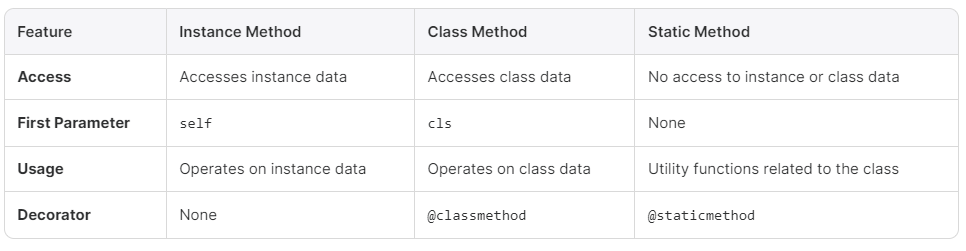

**7) Create a class Engine and a class Car that uses Engine as a component.** Composition

In [ ]:
 class Engine:
    def __init__(self, horsepower):
        self.horsepower = horsepower

class Car:
    def __init__(self, model, engine):
        self.model = model
        self.engine = engine

my_engine = Engine(150)
my_car = Car("Ford", my_engine)
print(f"Car Model: {my_car.model}, Engine Horsepower: {my_car.engine.horsepower}")


Car Model: Ford, Engine Horsepower: 150
